## This is used to generate tests and figures appropriated



In [ ]:

tests = TestInstance(0,10,1,10)
tests.runTests()
tests.createGraph()

## Configure your testing using
TestInstance class by init with <br>
TestInstance(parameter_choice(index), start_value, max_value, nbTests)<br>
Then execute runTests and createGraph
<p>
tests = TestInstance(0,10,1,10)
tests.runTests()
tests.createGraph()
</p>

In [176]:
from tqdm import tqdm
import subprocess
import seaborn
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
import matplotlib.pyplot as plt

#plt.style.use('seaborn')
class Parameter():
	def __init__(self,name,default_value):
		self.value  = default_value
		self.name = name
		
	def get_default_value(self):
		return self.default_value
	
	def add_endpoint(self, start, value, nbSteps):
		self.default_value = start
		self.value = self.default_value
		self.endpoint = value 
		self.nbSteps = nbSteps
	def __str__(x):
		return x.name + ": "+str(x.value) 
	def __repr__(self):
		return self.__str__()
class IntParameter(Parameter):
	def __init__(self, name, default_value):
		self.name = name 
		self.default_value = default_value
		self.endpoint = None 
		self.it = 1
		self.value = default_value
	
	def next(self):
		if(self.endpoint == None):
			return self.default_value
		else: 
			self.it+=1
			self.value = int(self.default_value - (self.default_value- self.endpoint) * self.it / self.nbSteps)
	def log(self):
		return int(self.default_value + (self.default_value- self.endpoint) * self.it / self.nbSteps)
	
class FloatParameter(Parameter):
	def __init__(self, name, default_value):
		self.name = name 
		self.default_value = default_value
		self.endpoint = None 
		self.it = 1 
		self.value = default_value
	def next(self):
		if(self.endpoint == None):
			return self.default_value
		else: 
			self.it+=1
			self.value = self.default_value + (self.default_value- self.endpoint) * self.it / self.nbSteps
	def log(self):
		return self.default_value + (self.default_value- self.endpoint) * self.it / self.nbSteps

class TestInstance():
	executable_path = "tests"
	separator =" "
	
	varying_param_log = []
	
	def __init__(self,choice, start_value, max_value, nbTests):
		self.possible_parameters = [IntParameter("nbThreads", 8), IntParameter("matrixSize", 2000), IntParameter("matrixRep",100), FloatParameter("blockper", 0.1)]
		self.algorithms = ["ARMPL","RSB","CYTOSIM_ORIGINAL", "CYTOSIM_NEW" ,"CYTOSIM_TEST"]
		self.choice = choice
		self.max_value = max_value
		self.start_value = start_value
		self.nbTests = nbTests
		self.variating_parameter = self.possible_parameters[choice]
		self.isRun = False
		self.variating_parameter.add_endpoint(self.start_value,max_value, nbTests)#adding trajectory 

		self.results = {}
		for algo in self.algorithms:
			self.results[algo] = []
		self.results[self.variating_parameter.name] = []
	def runTests(self):
		
		for i in tqdm(range(self.nbTests)):
			self.execWith(self.possible_parameters)
			for param in self.possible_parameters:
				param.next()
			self.varying_param_log.append(self.variating_parameter.log())
		
		self.isRun = True
	def execWith(self, parameters):
		print("Running with : "+str(parameters))
		args = [str(param.value) for param in self.possible_parameters]
		command = [self.executable_path] + args
		result = subprocess.run(command, capture_output=True, text=True)
		f = open("res/compute.out")
		f.readline()#skipping first line
		res = f.readline().strip().split(self.separator)
		i = 0
		for algo in self.algorithms:
			self.results[algo].append(int(res[i]))
			i+=1
		self.results[self.variating_parameter.name].append(int(self.variating_parameter.value))
	def createGraph(self):
		if(self.isRun):
			plt.figure(dpi=500)
			for algo in self.algorithms:
				plt.plot(self.results[self.variating_parameter.name], self.results[algo],label=algo)
				plt.title("Computational time in term of "+self.variating_parameter.name)
				plt.legend()
			plt.show()
		else:
			raise Exception("Do not run createGraph before runTests")

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:01,  8.70it/s]

Running with : [nbThreads: 1, matrixSize: 2000, matrixRep: 100, blockper: 0.1]
Running with : [nbThreads: 2, matrixSize: 2000, matrixRep: 100, blockper: 0.1]


 40%|████      | 4/10 [00:00<00:00, 11.34it/s]

Running with : [nbThreads: 3, matrixSize: 2000, matrixRep: 100, blockper: 0.1]
Running with : [nbThreads: 4, matrixSize: 2000, matrixRep: 100, blockper: 0.1]
Running with : [nbThreads: 5, matrixSize: 2000, matrixRep: 100, blockper: 0.1]


 70%|███████   | 7/10 [00:00<00:00, 15.31it/s]

Running with : [nbThreads: 6, matrixSize: 2000, matrixRep: 100, blockper: 0.1]
Running with : [nbThreads: 7, matrixSize: 2000, matrixRep: 100, blockper: 0.1]
Running with : [nbThreads: 8, matrixSize: 2000, matrixRep: 100, blockper: 0.1]
Running with : [nbThreads: 9, matrixSize: 2000, matrixRep: 100, blockper: 0.1]


 90%|█████████ | 9/10 [00:00<00:00,  8.88it/s]

Running with : [nbThreads: 10, matrixSize: 2000, matrixRep: 100, blockper: 0.1]


100%|██████████| 10/10 [00:01<00:00,  7.32it/s]


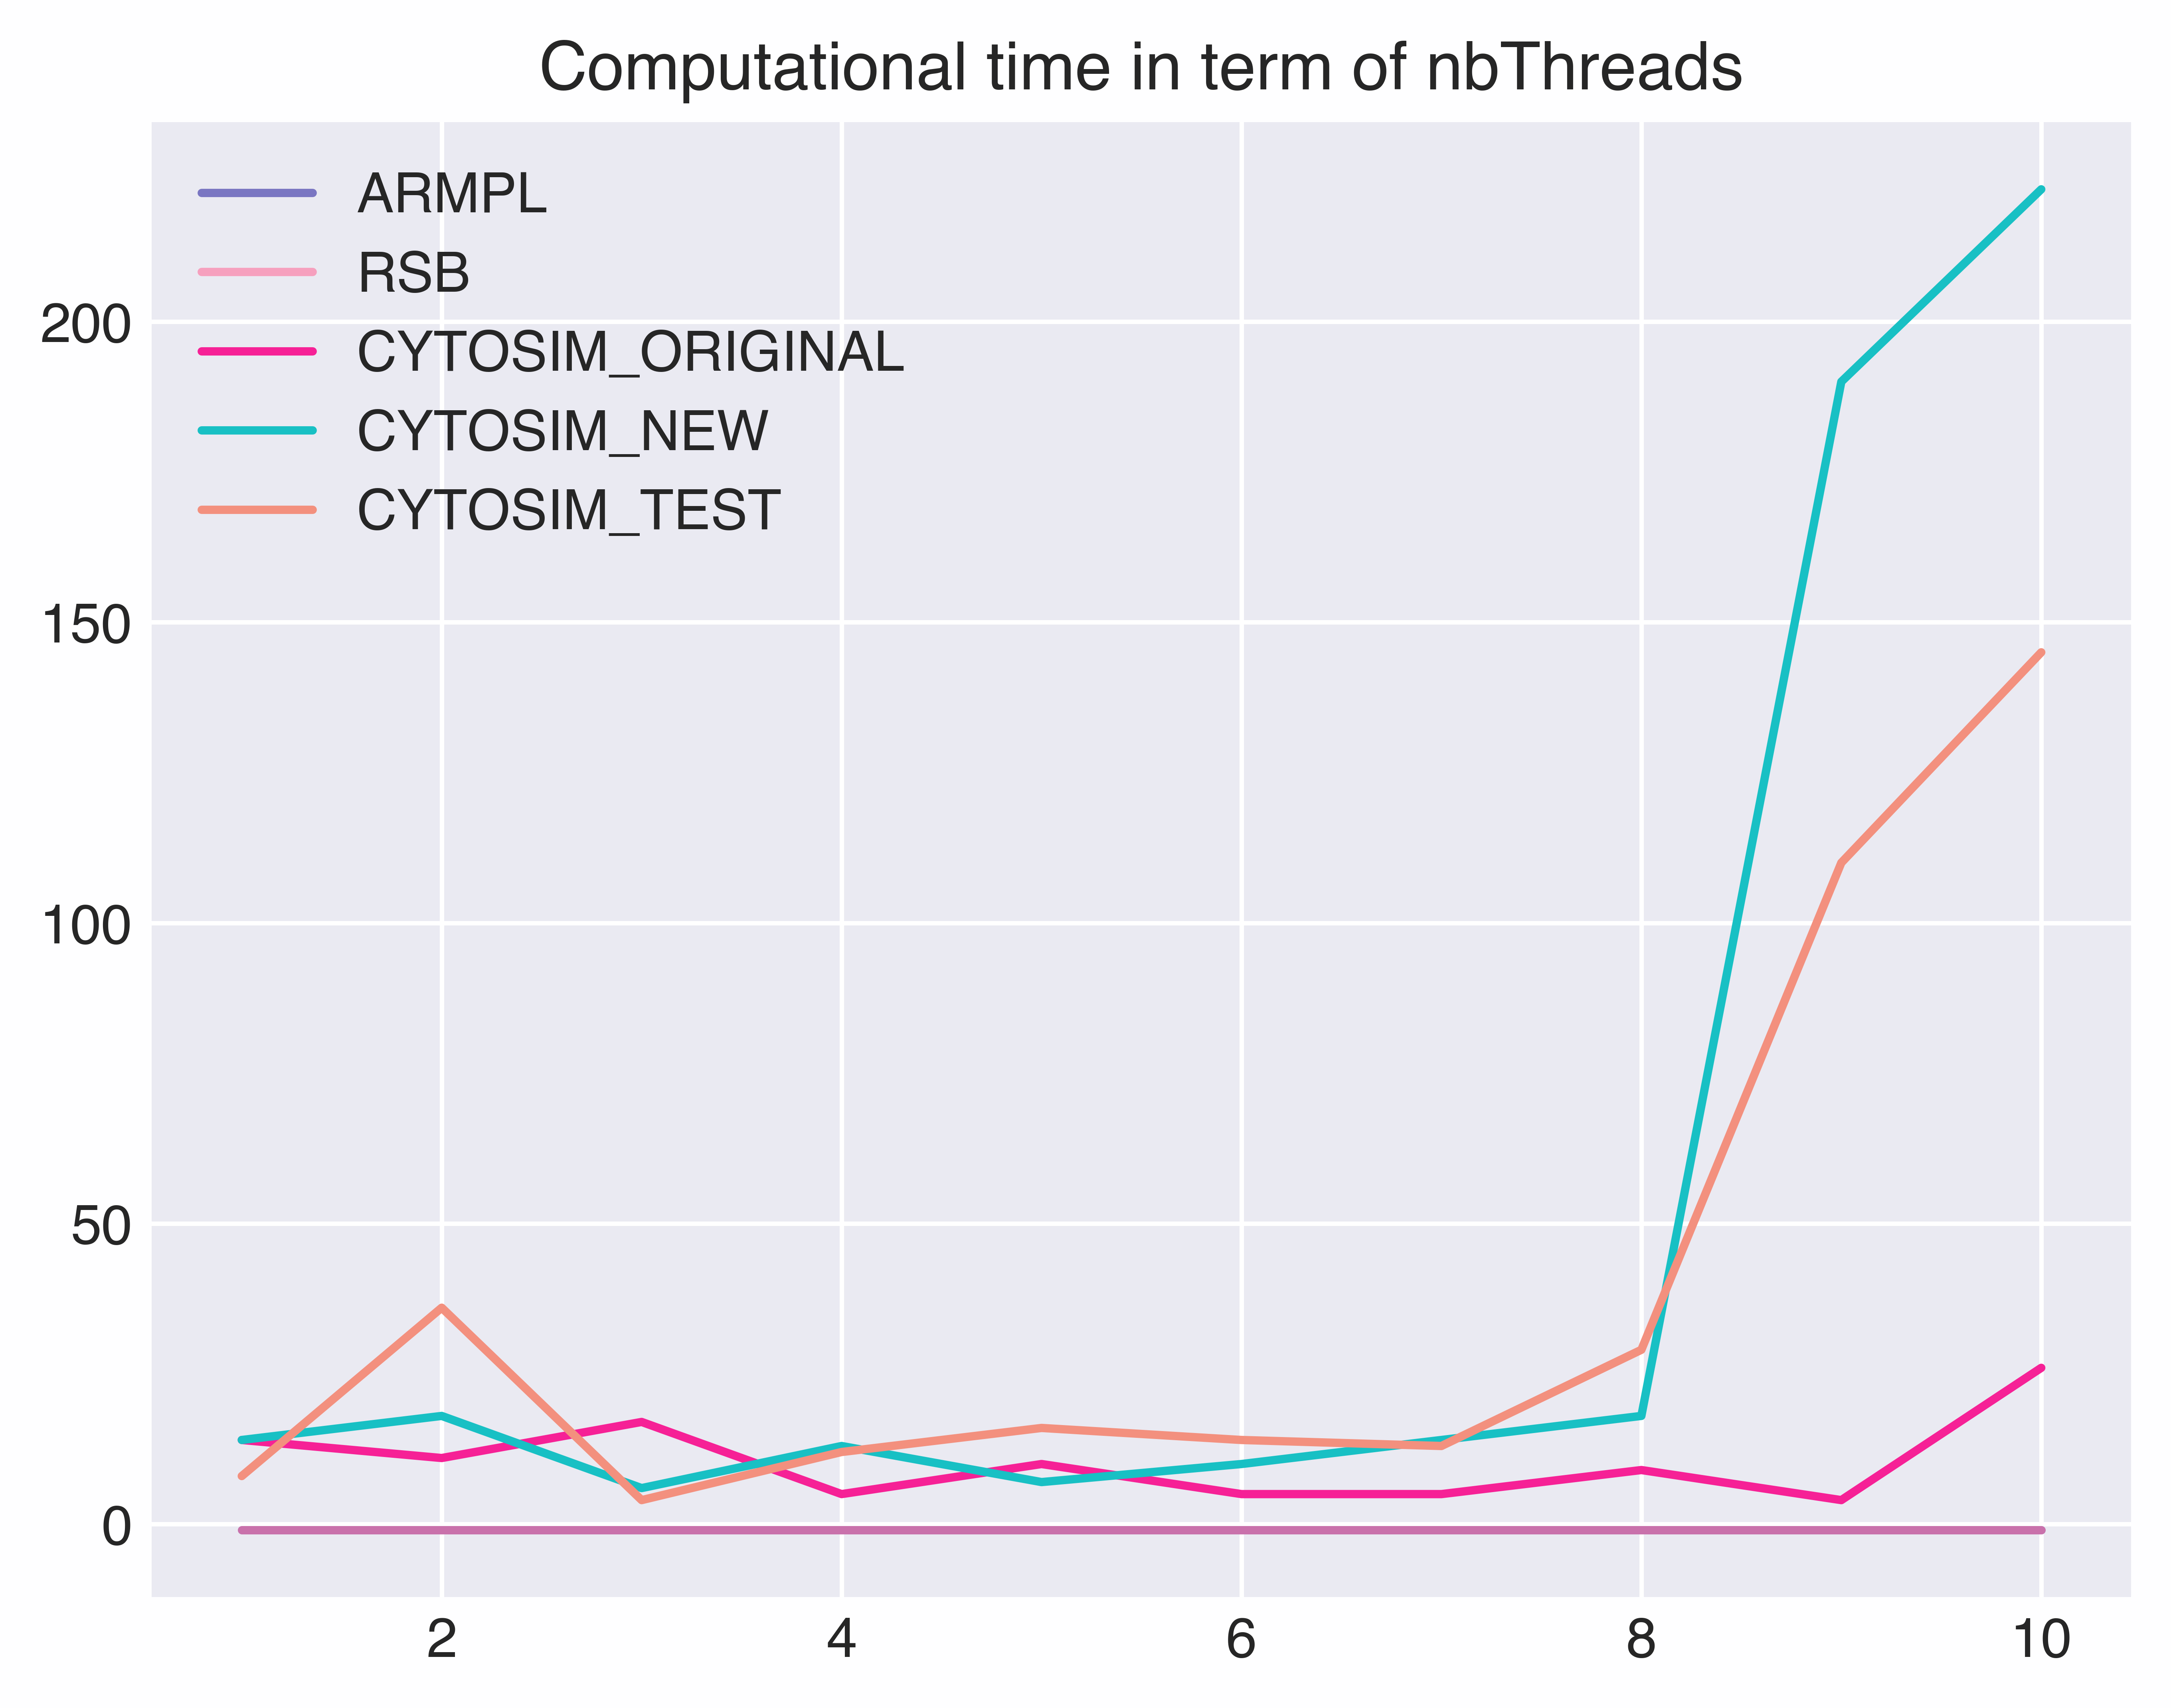

In [177]:

tests = TestInstance(0,1,10,10)
tests.runTests()
tests.createGraph()

In [129]:
blalbal.results

{'ARMPL': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 'RSB': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 'CYTOSIM_ORIGINAL': [23, 27, 33, 38, 43, 52, 81, 63, 71, 79],
 'CYTOSIM_NEW': [17, 21, 29, 30, 33, 39, 48, 50, 55, 62],
 'CYTOSIM_TEST': [18, 22, 34, 31, 36, 42, 48, 55, 59, 67],
 'matrixSize': [5000, 5499, 5998, 6497, 6996, 7495, 7994, 8493, 8992, 9491]}

In [ ]:
CHOICE = 3
MAX_VALUE = 1
START_VALUE = 0.1
NB_TESTS = 100

**This sections generates tests in normal mode with variations of nbThreads, matrixSize, matrixRep, block %**

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [03:44<00:00,  2.24s/it]


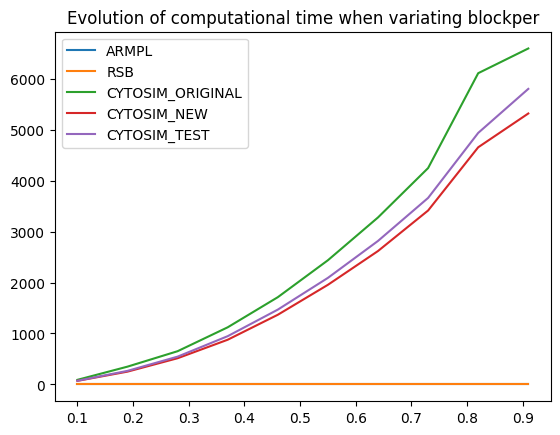

In [100]:
result_dict

{'ARMPL': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 'RSB': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 'CYTOSIM_ORIGINAL': [90, 349, 652, 1121, 1712, 2437, 3277, 4246, 6108, 6593],
 'CYTOSIM_NEW': [70, 251, 514, 877, 1367, 1955, 2618, 3413, 4654, 5317],
 'CYTOSIM_TEST': [72, 266, 545, 947, 1468, 2091, 2816, 3660, 4936, 5800],
 'blockper': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [84]:
result_

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]